![](Images/2022-11-29-23-14-59.png)

In [65]:
# Define file of parameters
parameters_file ="""
param : I  : x   :=
        1   0.18
        2   0.17
        3   0.47
        4   0.95
        5   0.90;

param :   I   : y :=
        1    0.21
        2    0.22
        3    0.47
        4    0.40
        5    0.50;
"""
with open('13_params.dat', 'w') as file:
    file.write(parameters_file)

In [66]:
# import libraries
import pyomo.environ as pyo
import numpy as np
import matplotlib.pyplot as plt

In [67]:
# initialize the abstract model
model = pyo.AbstractModel()

# Declare the parameters and the variables
model.I = pyo.Set()
model.x = pyo.Param(model.I)
model.y = pyo.Param(model.I)

# define the lower constraint in the bounds # we can't use R in bounds because it is a variable
model.R = pyo.Var(bounds=(0,1), within=pyo.NonNegativeReals, initialize=0)
model.X = pyo.Var(bounds=(0,1), within=pyo.NonNegativeReals, initialize=0.5)
model.Y = pyo.Var(bounds=(0,1), within=pyo.NonNegativeReals, initialize=0.5)

# Declare the constraints
model.c1 = pyo.Constraint(expr= model.X <= 1- model.R)
model.c2 = pyo.Constraint(expr= model.Y <= 1- model.R)
model.c3 = pyo.Constraint(expr= model.X >= model.R)
model.c4 = pyo.Constraint(expr= model.Y >= model.R)

def con_05_rule(model,i):
    return  (model.X - model.x[i])**2 + (model.Y - model.y[i])**2 >= model.R**2
model.c5 = pyo.Constraint(model.I, rule=con_05_rule)

# Declare the objective function
model.OF = pyo.Objective(expr=model.R, sense=pyo.maximize)

# Define the solver
solver = pyo.SolverFactory('ipopt')
instance = model.create_instance("13_params.dat")
results = solver.solve(instance)

results.write()

# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 9
  Number of variables: 3
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Message: Ipopt 3.11.1\x3a Optimal Solution Found
  Termination condition: optimal
  Id: 0
  Error rc: 0
  Time: 0.13399982452392578
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of solutions: 0
  number of solutions displayed: 0


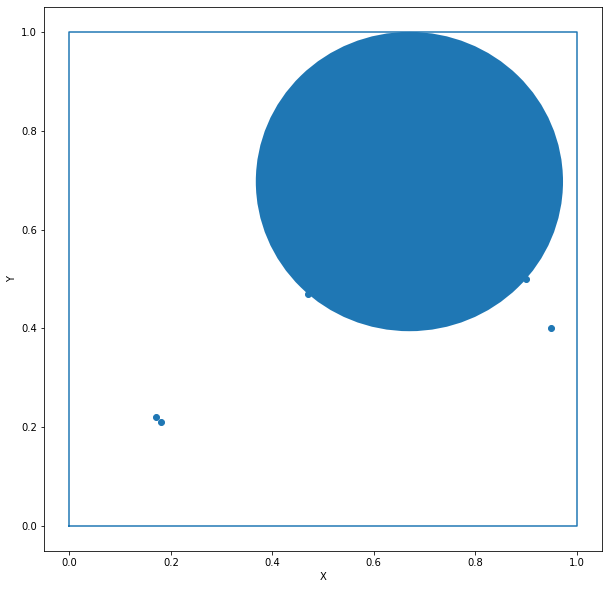

In [68]:
plt.figure(figsize=(10,10))
ax= plt.subplot()
plt.plot([0,0,1,1,0],[0,1,1,0,0])
plt.xlabel("X")
plt.ylabel("Y")
x= [pyo.value(instance.x[i]) for i in instance.I]
y= [pyo.value(instance.y[i]) for i in instance.I]
plt.scatter(x,y)

# plot the circle
circle = plt.Circle((pyo.value(instance.X), pyo.value(instance.Y)), pyo.value(instance.R))
ax.add_patch(circle)

In [60]:
(pyo.value(instance.X), pyo.value(instance.Y)), pyo.value(instance.R)

((0.670196037823825, 0.6971901357508525), 0.3028098683573287)